<a href="https://colab.research.google.com/github/Ashish265/langGraph-projects/blob/main/Conditional_Graph_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 11.6 MB/s eta 0:00:00


In [19]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [20]:
class Agentstate(TypedDict):
  number1:int
  operation: str
  number2: int
  finalNumber : int
  number3:int
  number4:int
  operation2:str
  finalNumber2:int

In [21]:
def adder(state:Agentstate) -> Agentstate:
  """ This node adds the 2 numbers """
  state["finalNumber"] = state['number1'] + state['number2']

  return state

def subtractor(state:Agentstate) -> Agentstate:
  """ This node subtracts the 2 numbers """
  state["finalNumber"] = state['number1'] - state['number2']

  return state

def decide_next_node(state:Agentstate) -> Agentstate:
  """ This node will select the next phase of the graph"""
  if state['operation'] == '+':
    return "addition_operation"
  elif state['operation'] == '-':
    return "subtraction_operation"

def adder2(state:Agentstate) -> Agentstate:
  """ This node adds the 2 numbers """
  state["finalNumber2"] = state['number3'] + state['number4']

  return state

def subtractor2(state:Agentstate) -> Agentstate:
  """ This node subtracts the 2 numbers """
  state["finalNumber2"] = state['number3'] - state['number4']

  return state

def decide_next_node2(state:Agentstate) -> Agentstate:
  """ This node will select the next phase of the graph"""
  if state['operation2'] == '+':
    return "addition_operation2"
  elif state['operation2'] == '-':
    return "subtraction_operation2"

In [22]:
graph = StateGraph(Agentstate)

In [23]:
graph.add_node("add_node", adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2",subtractor2)
graph.add_node("router1",lambda state:state)
graph.add_node("router2",lambda state:state)

graph.add_edge(START,"router1")
graph.add_conditional_edges("router1",
                            decide_next_node,
                            {
                                "addition_operation":"add_node",
                                "subtraction_operation":"subtract_node"
                             }
                            )


graph.add_edge("add_node","router2")
graph.add_edge("subtract_node","router2")


graph.add_conditional_edges("router2",
                            decide_next_node2,
                            {
                                "addition_operation2":"add_node2",
                                "subtraction_operation2":"subtract_node2"
                             }
                            )

graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)

app= graph.compile()

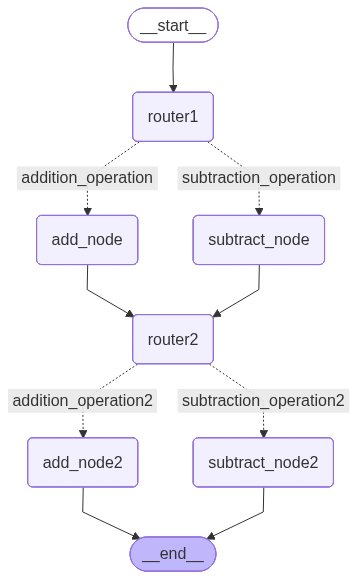

In [24]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
initial_state1 = Agentstate(number1=10,operation="-",number2=5,number3=7,number4=2,operation2="+")

In [26]:
print(app.invoke(initial_state1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber2': 9}
